# Beispiel 4.2: Berechnung von Gleichgewichtskonstanten
Bearbeitet von Amke Wiesner

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 42 - 43. Die Nummerierung der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Das hier angewandte Vorgehen entspricht dem im Lehrbuch vorgestellten Lösungsweg. Alternativ kann die thermodynamische Gleichgewichtskonstante auch mit der GIBBS-HELMHOLTZ-Beziehung nach Glg. (4.9) berechnet werden.

# Code

Um mit der Berechnung starten zu können, werden zunächst die benötigten Pakete importiert.

 - numpy
     - Zur Durchführung von numerischen Operationen und zum Arbeiten mit Arrays
     - Informationen unter https://numpy.org/doc/stable/reference/routines.array-creation.html
 - matplotlib
     - Zum Erstellen von Grafiken
     - https://matplotlib.org/stable/tutorials/introductory/index.html
 - scipy 
     - Zur Durchführung wissenschaftlicher Rechnungen 
     - Hier zur Lösung von Integralen mit *quad*
     - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Die im Beispiel gegebenen Werte werden in Variablen angelegt.

Die Stoffdaten werden in numpy-Arrays gespeichert. Der erste Eintrag eines Arrays entspricht hier dem Wert für $\text{N}_\text{2}$, der zweite  für $\text{H}_\text{2}$ und der dritte für $\text{NH}_\text{3}$. Zur Berechnung von Summen kann später das Skalarprodukt der betroffenen Arrays gebildet werden.

In [2]:
# x = [N2, H2, NH3]        # Form
nu  = [-1, -3, 2]          # -            stöchiometrische Koeffizienten
cp  = [29.1, 28.8, 35.1]   # J/(mol K)    Wärmekapazität
H_f = [0, 0, -45.9e3]      # J/mol        Bildungsenthalpie
G_f = [0, 0, -16.3e3]      # J/mol        freie Bildungsenthalpie

In [3]:
T_ref = 298.15             # K            Referenztemperatur
p_ref = 1e5                # Pa           Referenzdruck
R     = 8.314              # J/(mol*K)    universelle Gaskonstante

## Berechnung für ${K}^{\ominus}$

Zunächst werden die konstanten Werte, die später benötigt werden, berechnet. An dieser Stelle wird das Skalarprodukt *np.dot* verwendet, um die Summe zu bilden.

\begin{equation*}
\text{np.dot} \bigg( \text{Array 1}, \space \text{Array 2} \bigg) \space \space \hat{=} \space \space \prod \bigg( \text{Array 1} \cdot \text{Array 2} \bigg)
\end{equation*}

In [4]:
# Wärmekapazität
Delta_R_cp = np.dot(nu,cp)            # Glg. (4.5)
Delta_R_cp = round(Delta_R_cp, 2)     # Runden auf zwei Nachkommastellen

print('c_p = ', Delta_R_cp, ' J/(mol K)')  # Ausgabe des Ergebnisses als Kombination aus Wert und Text in '...'

c_p =  -45.3  J/(mol K)


In [5]:
# Reaktionsenthalpie
Delta_R_H = np.dot(nu,H_f)            # Glg. (4.1)
Delta_R_H = round(Delta_R_H, 2)

print('Delta_R_H = ', Delta_R_H, ' J/mol')

Delta_R_H =  -91800.0  J/mol


In [6]:
# Freie Reaktionsenthalpie
Delta_R_G = np.dot(nu, G_f)          # Glg. (4.7)
Delta_R_G = round(Delta_R_G, 2)

print('Delta_R_G = ', Delta_R_G, ' J/mol')

Delta_R_G =  -32600.0  J/mol


Der Temperaturbereich, in dem die Gleichgewichtskonstanten betrachtet werden sollen, wird als *linspace* angelegt. Dabei wird ein Array gebildet, in dem die obere und untere Grenze des Zahlenbereiches angegeben werden sowie die Anzahl der Einträge, die der Array umfassen soll.

\begin{equation*}
\text{np.linspace} \Big( \text{untere Grenze}, \text{obere Grenze}, \text{Anzahl der Einträge} \Big)
\end{equation*}

Ein Beispiel:

In [7]:
Beispiel = np.linspace(0, 10, 11)
print(Beispiel)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [8]:
steps = 101
Temp = np.linspace (400+273.15, 500+273.15, steps) # K    Temperatur

Die thermodynamischen Gleichgewichtskonstante $K^\ominus$ wird nach Glg. (4.12) berechnet.

Zum Lösen der Integrale wird die Funktion *quad* aus dem Paket *scipy* verwendet.
Die Funktion, die integriert werden soll, wird in einer separaten Funktion angelegt, auf die innerhalb des *quad*-Befehls zugegriffen wird. 
Für die Integrationsgrenzen werden konstante Werte eingesetzt. In diesem Fall wird allerdings die obere Grenze (die Temperatur) variiert. Damit dennoch konstante Werte für die Integration verwendet werden können, wird die Integration innerhalb einer Schleife durchgeführt, sodass die Rechnung in jedem Durchgang für eine neue Temperatur durchgeführt wird.

Der quad-Befehl ist wie folgt aufgebaut: 
\begin{equation*}
\text{quad} \Big( \text{Funktion}, \text{untere Grenze}, \text{obere Grenze}\Big)
\end{equation*}

Die Ausgabe einer quad-Funktion enthält immer zwei Werte:

\begin{equation*}
\text{Ausgabe}: \Big( \text{Ergebnis}, \text{Fehler} \Big)
\end{equation*}

Der erste Eintrag ist das Ergebnis der Integration, der zweite Wert gibt an, wie groß der Fehler ist. 
Für die Rechnung wird demnach der erste Eintrag verwendet. Indem hinter dem *quad*-Befehl *[0]* ergänzt wird, wird nur der erste Eintrag des Ausgabevektors verwendet.

Die Temperaturen die als obere Grenze eingesetzt werden sollen, sind im Array *Temp* bereits festgelegt.

Die in Temp enthaltenen Werte werden in einer *for-Schleife* nacheinander für $T$ eingesetzt. Mit Zwischenergebnissen für $\Delta_\text{R}H(T)$ und $\Delta_\text{R}G(T)$ wird für jede Temperatur ein $K^{\ominus}$ berechnet und in der Variablen *K0_save* gespeichert.


In [9]:
K0_save = np.zeros(steps)
counter = 0

for T in Temp:
    
    def Delta_R_H_var(T):     # Glg. (4.4)
        return Delta_R_H + (quad(integrand_h, T_ref, T)[0])    
    
    def integrand_h(T):       # Integral aus Glg. (4.4)
        return Delta_R_cp

    
    def Delta_R_G_var(T):    # Glg. (4.8)
        return T * Delta_R_G / T_ref - T * (quad(integrand_g, T_ref, T)[0])
    
    def integrand_g(T):      # Integral aus Glg. (4.8)
        return Delta_R_H_var(T) / (T**2)    
    
    
    def K0(T):               # Glg. (4.12)
        return np.exp(-Delta_R_G_var(T) / (R * T))
    
    K0_save[counter] = K0(T)
    
    counter = counter + 1

## Grafische Darstellung von $K^\ominus$:

Die Grafik wird mit dem Paket *matplotlib.pyplot* erstellt.
Eine ausführliche Beschreibung der verschiedenen Befehle ist unter dem oben angegebenen Link zu finden.

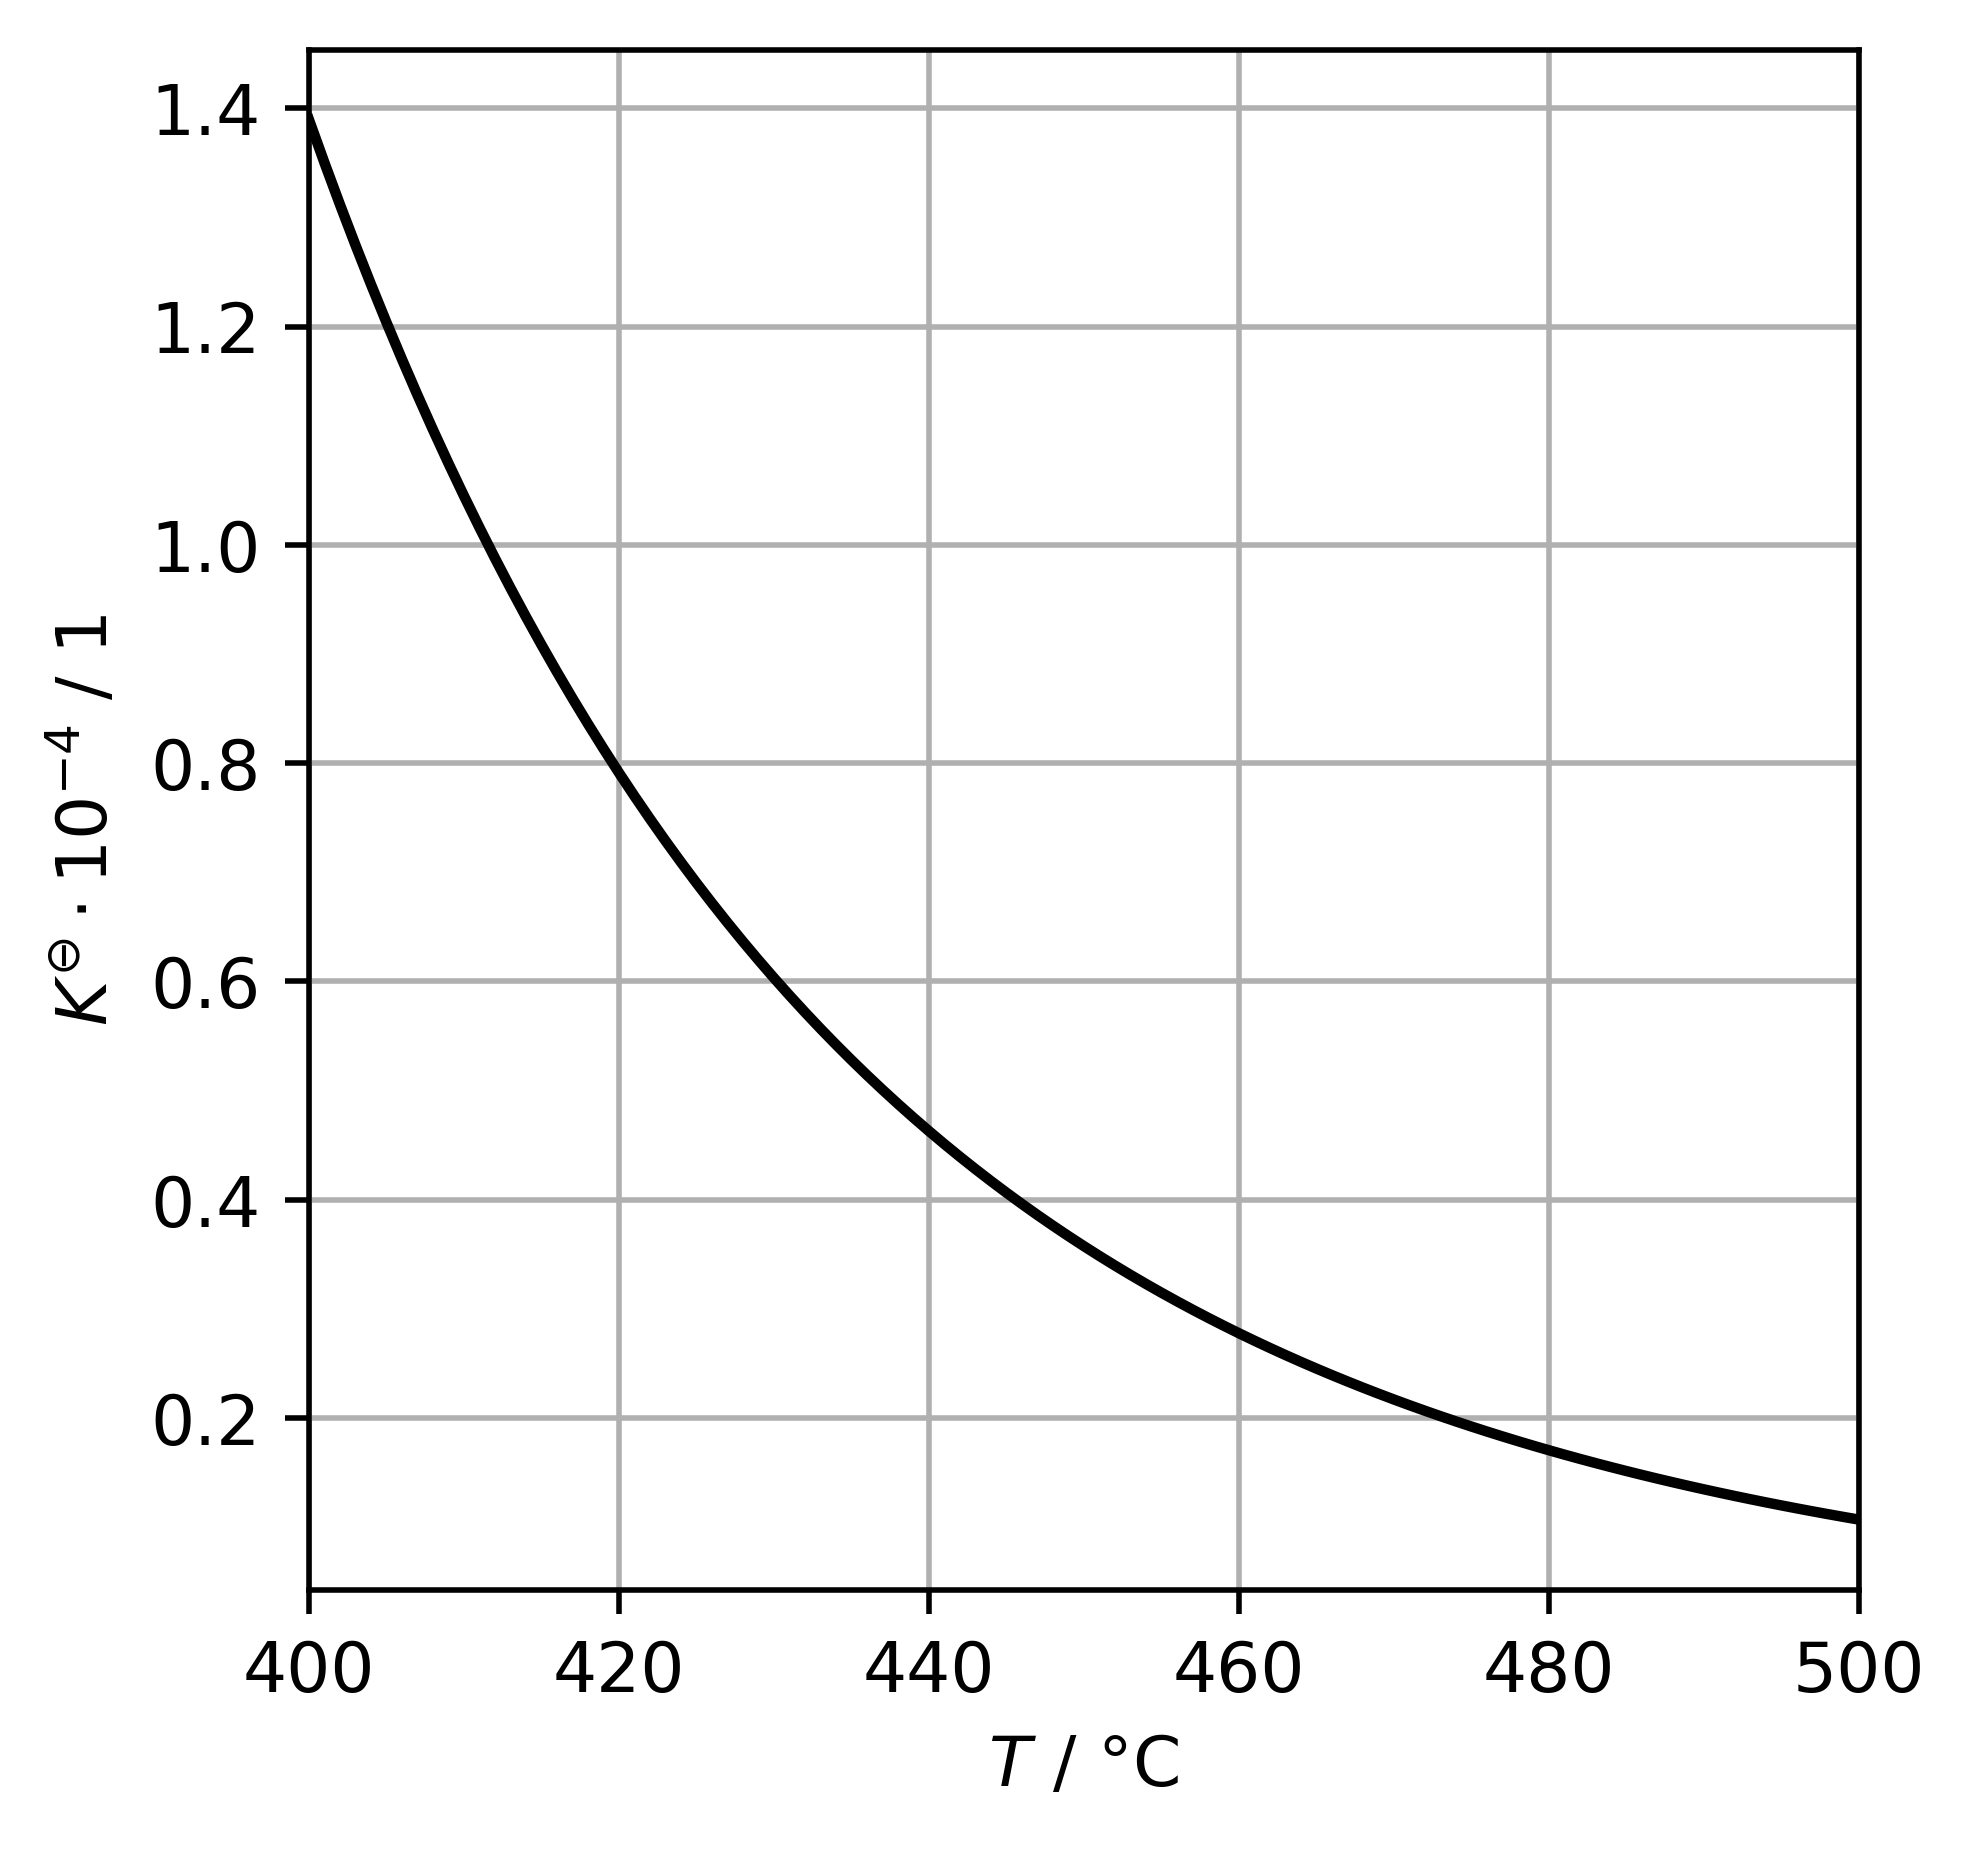

In [10]:
plt.figure(dpi = 300, figsize = (4,4))             # Qualität und Größe der Grafik

plt.plot(Temp-273.15, K0_save * 10**4, color = 'black')    # Erstellen des Graphen

plt.xlabel('$T$ / °C')                               # Beschriftung der x-Achse
plt.ylabel('$K^{\ominus} \cdot 10^{-4}$ / 1')          # Beschriftung der y-Achse
plt.xlim(400,500)                                  # Grenzen der x-Achse

plt.grid(True)                                     # Gitter anzeigen
plt.show()                                         # Grafik zeigen

## Berechnung für $K_\text{x}$

Aus Glg. (4.13) und Glg. (4.14) ergibt sich folgender Ausdruck zur Berechnung der speziellen Gleichgewichtskonstanten $K_\text{x}$:

\begin{equation*}
K_\text{x} = K^\ominus \cdot \bigg( \frac{p^\ominus}{p} \bigg) \space ^{\sum \nu_i}
\end{equation*}

In [11]:
def K_x(p):
    return K0_save * (p_ref/p)**(np.sum(nu))

## Grafische Darstellung von ${K}_\text{x}$:

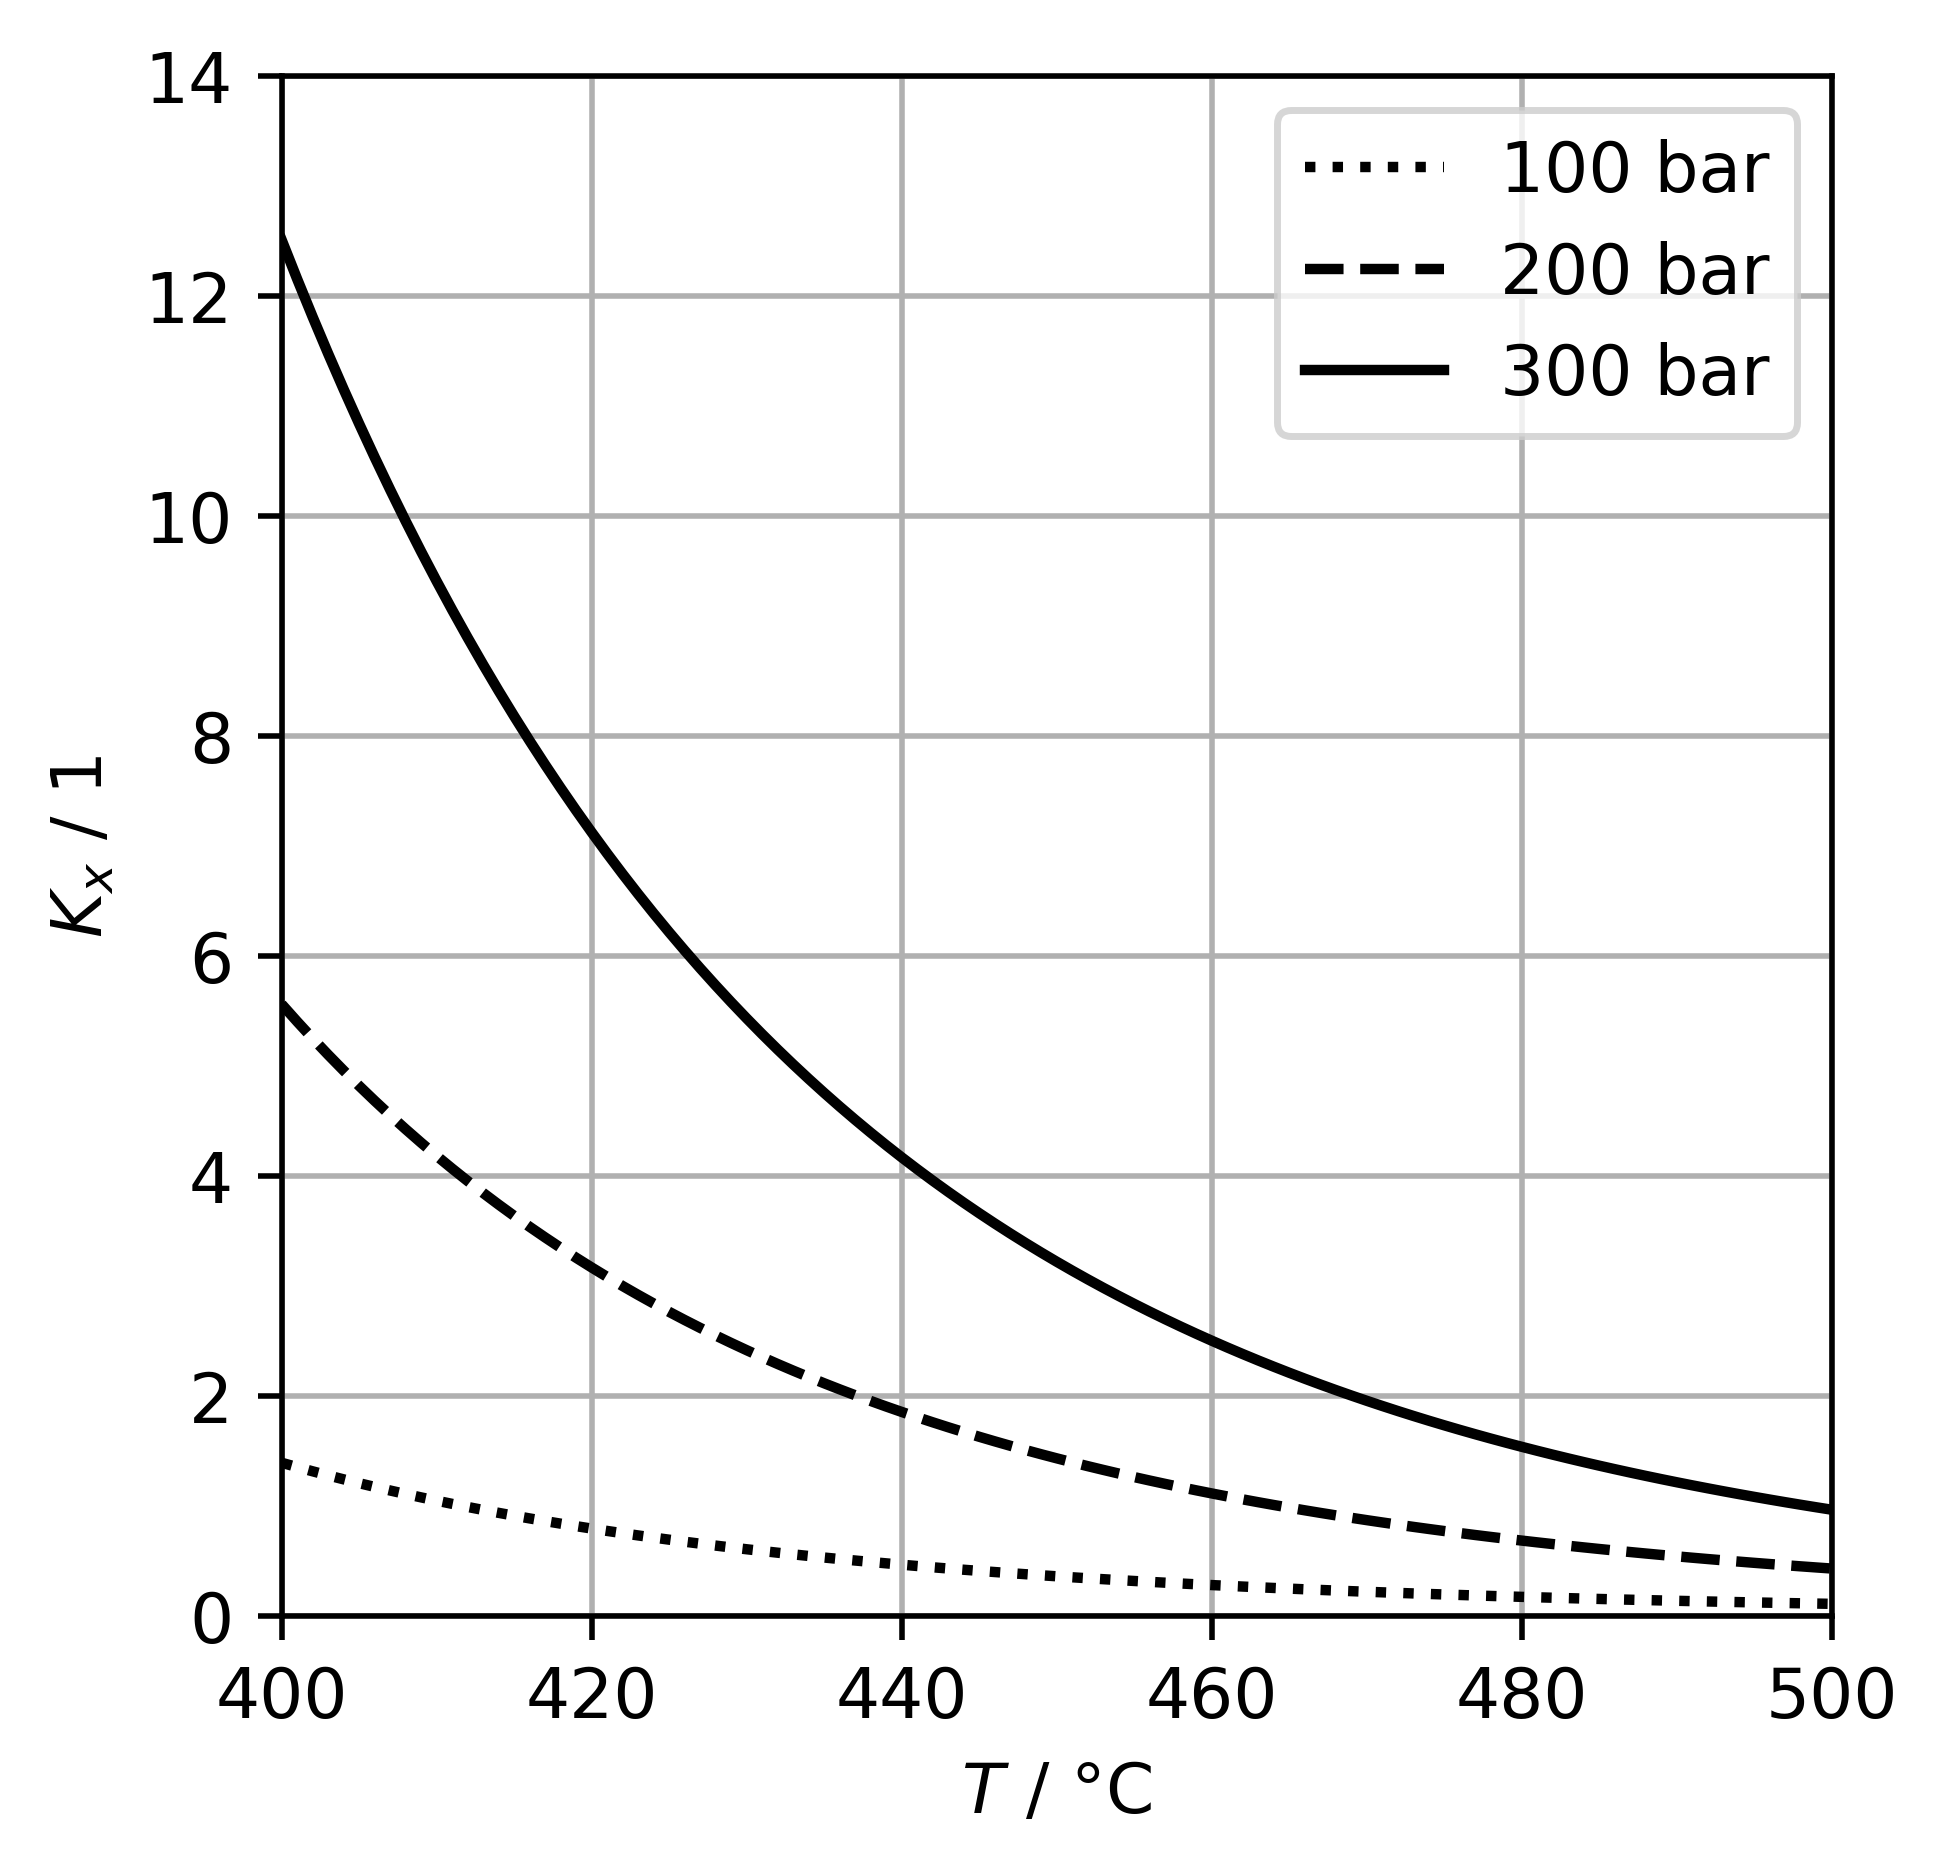

In [12]:
plt.figure(dpi = 500, figsize = (4,4))
plt.plot(Temp-273.15,K_x(100e5), linestyle = 'dotted', label = '100 bar', color = 'black')
plt.plot(Temp-273.15,K_x(200e5), linestyle = 'dashed', label = '200 bar', color = 'black')
plt.plot(Temp-273.15,K_x(300e5), linestyle = 'solid' , label = '300 bar', color = 'black')

plt.xlabel('$T$ / °C')
plt.ylabel('$K_x$ / 1')
plt.xlim(400, 500)
plt.ylim(0, 14)

plt.grid(True)
plt.legend(loc = 'best')      # Anzeigen einer Legende mit Einträgen aus "label"
plt.show()